## Writing to Files and Reading from Them

So far, we have been working in "console world", a world where we print our output to our Jupyter notebeook cells, and we are happy to do it. But that has it's limitations. What makes these techniquest powerful, is our ability to save files to be accessed later, and to grab data and files from our computers or from data on the internet, or the world wide infonet as it was once called, albeit briefly.

Let's go there! 

### Writing to a File:

#### Some basics: 
Following the "law of primacy" ie; what you first learn you will remember most...here is the correct format for writing to a file:


In [ ]:
#Please assign 'first_lines_leader.txt'. 
#Please replace "content" with the first 3 lines of your favorite speech made by a world leader.
#Then, run the code:

filename = 'first_lines_leader.txt'
content = 'Strange and impressive associations rise in the mind of a man from the New World who speaks before this august body in this ancient institution of learning. Before his eyes pass the shadows of mighty kings and warlike nobles, of great masters of law and theology; through the shining dust of the dead centuries he sees crowded figures that tell of the power and learning and splendor of times gone by; and he sees also the innumerable host of humble students to whom clerkship meant emancipation, to whom it was well-nigh the only outlet from the dark thralldom of the Middle Ages.'
with open(filename, 'w') as file:
    file.write(content)
print(f"Content written to {filename} successfully.")

#Go to your finder. You should find your file in the same location as where you are working on this notebook.
#Confirm you located your file. it.

### Let's break it down:

1. Filename and content as variables:
I assigned 'example.txt' to the filename variable and the string to the content variable. This is good practice because it makes the code more flexible and easier to modify.

2. with open('filename', 'w') as file:
This opens (or creates) a file named 'filename' in write mode ('w'), which will overwrite any existing content in the file.
file is the file object you are working with. The file is automatically closed after the block.

3. The content is then written to the file object you created. By the way you can call "file" anything. Lot's of times I'll write "fo" or even f

4. A print statement confirms it worked.


### Oh....Did you find your file in your finder? Assuming the answer is "yes"...good job! Now let's grab that content and read it to the console


In [ ]:
#Below:
#filename is a string that holds the name of the file.
#file is the file object created by open(filename, 'r').
#The file.read() method reads the content of the file.
#The print(content) prints out what was read from the file.

with open(filename, 'r') as file:
    content = file.read()
print(content)

### Read vs Readlines
Above, we see that we can grab all the content of the fie using read(). This is a great way to go if we want to work with the file content as a whole, for example, searching for a word in the entire file, or processing word frequency distribution on a presidential speech.

But what if the the file is very large? Teading the entire content into memory can be inefficient or even cause memory issues. 

Or what if we want to process the file line by line and pull out spaces, or other extraneous info that we don't want? 

Readlines to the rescue! 
Readlines reads the file line by line and returns a list of strings, where each string represents a line from the file.

Use readlines() when you need to work with the file line by line, and you want to process or iterate over the lines.

Here is an example:

In [ ]:
with open(filename, 'r') as file:
    lines = file.readlines()  # Reads the file and returns a list of lines
for line in lines:
    print(line.strip())  # Strip removes newline characters

### Alternative for very large files: 
I want to introduce you to this idea, because ChatGPT might suggest it, so I want you to be exposed and know what's going on.
For very large files, neither read() nor readlines() may be efficient. Instead, you can read the file line by line without loading the whole file into memory using what is called a file object iterator:



In [ ]:

with open(filename, 'r') as file:
    for line in file:
        print(line.strip())

That said, you should use read() or readlines() in the majority of your cases as your file size will be moderately large at most.

### Some summary:

Opening a File:

Modes:
'r' = read
'w' = write (overwrites the file if it exists)
'a' = append (adds to the end of the file)
'b' = binary mode (for non-text files)



## All the President's Speeches 
20 pts

As we learned on Thursday, word frequency distribution is an intuitive way of determining the major themes, topics, or even preoccupations of the speech giver.

Pull texts from different US presidents and use FreqDist() to gain insights into the data. This is a fairly open assignment. The goal is to identify something interesting! Pull the text, tokenize, remove stopwords, and plot the frequency of the words. That's the technical part. But much of this assignment is your ability to use word frequency to gain insights comparatively, intra or inter presidents. Let the python notebook from our lecture be your guide! The more interesting and creative the analysis, the more points you will receive. We might pick one student's analysis to be displayed in lecture, and that person will receive bonus credit for the work.

For full credit, please demonstrate the use of read(), readlines(), and write() to a file in this assignment. Where you do it? Up to you!

In [9]:
#Use as many cells as you need to. Your code here:
import nltk
from nltk import FreqDist
from nltk.tokenize import word_tokenize
from nltk.corpus import inaugural
from nltk.corpus import stopwords
stopwords=nltk.corpus.stopwords.words("english")



In [ ]:
print(inaugural.fileids())

In [5]:
name = 'All speeches.txt'

with open(name, 'w') as f:  
    for file in inaugural.fileids():
        words = inaugural.words(file)
        speech_text = ' '.join(words)
        # Write the speech to the file with a newline at the end, no filename
        f.write(speech_text + '\n\n')  # Double newline for separation between speeches

In [ ]:
with open(name, 'r') as file:
    lines = file.readlines()  # Reads the file and returns a list of lines
for line in lines:
    print(line.strip())  # Strip removes newline characters

In [ ]:
with open(name, 'r') as file:
    content = file.read()
print(content)

In [ ]:
all_speeches = ' '.join([' '.join(inaugural.words(file)) for file in inaugural.fileids()])

tokens = all_speeches.split()

fdist = FreqDist(tokens)
print(fdist.most_common(20))

[('the', 9555), (',', 7275), ('of', 7169), ('and', 5226), ('.', 5011), ('to', 4477), ('in', 2604), ('a', 2229), ('our', 2062), ('that', 1769), ('be', 1505), ('is', 1477), ('we', 1281), ('for', 1141), ('by', 1063), ('it', 1036), ('have', 1029), ('which', 1007), ('not', 972), ('will', 935)]


[('I', 882), ('The', 634), ('people', 589), ('We', 557), ('us', 502), ('must', 373), ('It', 366), ('upon', 365), ('Government', 334), ('States', 331), ('world', 327), ('great', 326), ('may', 323), ('country', 316), ('shall', 312), ('every', 285), ('government', 264), ('one', 253), ('peace', 251), ('nation', 243)]
[('I', 882), ('The', 634)]
Axes(0.125,0.11;0.775x0.77)


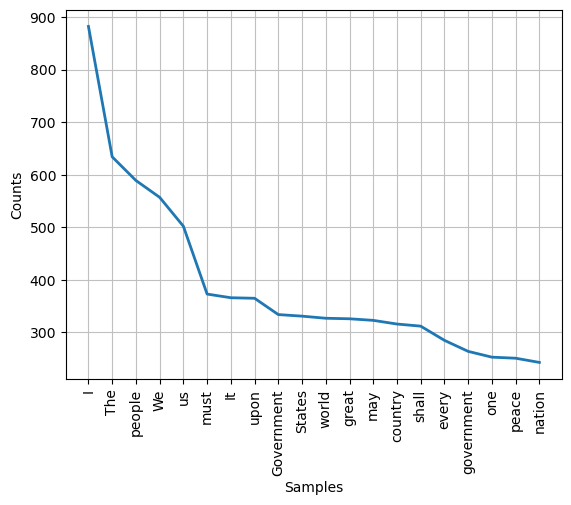

In [16]:
clean_speeches = []

for word in tokens:
    if word not in stopwords and word.isalpha() == True:
        clean_speeches.append(word)
    else:
        pass

fdist2 = FreqDist(clean_speeches)
print(fdist2.most_common(20))

x=fdist2.most_common(2)
print(x)
print(fdist2.plot(20))



### Scraping
That's great that we can analyze text that is pre-processed in the NLTK package. But what if NLTK doesn't have the text we want? I mean as awesome as Jane Austen and inaugural texts are.... 

Text scraping, also known as web scraping or data scraping, refers to the process of automatically extracting text data from websites or other online sources. Over my 14 years, I have seen companies and websites realize that they should not just easily give away their text data. Scraping used to be easy. Data used to be easy to grab from the internet. It's gotten harder for some sites, but others allow access, or simply haven't gotten around to restricting it. **WHEN SCRAPING, PLEASE MAKE SURE YOU ARE NOT VIOLATING TERMS OF USE**. Usually, these apply to commercial use, and for research or academic purposes, there are fewer restrictions. 

Below is some code for you to scrape a website. The package is called "Beautiful Soup" I have given you code below to use.

I have given you TWO websites to scrape. PLEASE PICK ONE of TWO. Either:

A speech from Christine LaGrande on Sustainable Development Goal: Here is the url: https://www.imf.org/en/News/Articles/2018/09/17/sp09172018-the-case-for-the-sustainable-development-goals' OR

"Joint Statement of the Russian Federation and the People’s Republic of China on the International Relations Entering a New Era and the Global Sustainable Development" Feb, 2022. Here is the url: http://www.en.kremlin.ru/supplement/5770

In [ ]:
import requests
from bs4 import BeautifulSoup
 
base_url = 'https://www.imf.org/en/News/Articles/2018/09/17/sp09172018-the-case-for-the-sustainable-development-goals'
r = requests.get(base_url)
soup = BeautifulSoup(r.text)
paragraphs = soup.find_all('p')

for p in paragraphs:
    print(p.get_text())

5 pts Modify the text above to write the text to a list called "document"


In [ ]:
# Your code here:
 
document = []

base_url = 'https://www.imf.org/en/News/Articles/2018/09/17/sp09172018-the-case-for-the-sustainable-development-goals'
r = requests.get(base_url)
soup = BeautifulSoup(r.text, 'html.parser')
paragraphs = soup.find_all('p')

for p in paragraphs:
    document.append(p.get_text().replace('\n', ' ').strip())

print(document)

In [ ]:
5 pts Write the code to a file called "document.txt"

In [22]:
base_url = 'https://www.imf.org/en/News/Articles/2018/09/17/sp09172018-the-case-for-the-sustainable-development-goals'
r = requests.get(base_url)
soup = BeautifulSoup(r.text)
paragraphs = soup.find_all('p')

with open('document.txt', 'w') as file:
    for p in paragraphs:
        file.write(p.get_text())
print(f"Content written to {'document.txt'} successfully.")

Content written to document.txt successfully.


20 pts Clean the document of any extraneous elements, remove stopwords and perform a word frequency distribution analysis on your document, showing and then plotting the top 20 words

[('economic', 12), ('IMF', 11), ('inequality', 11), ('SDGs', 10), ('global', 10), ('SDG', 10), ('countries', 10), ('percent', 10), ('Helen', 9), ('need', 9), ('also', 8), ('world', 8), ('would', 7), ('people', 7), ('social', 7), ('remarkable', 6), ('Let', 6), ('associated', 6), ('greater', 6), ('many', 6)]


<Axes: xlabel='Samples', ylabel='Counts'>

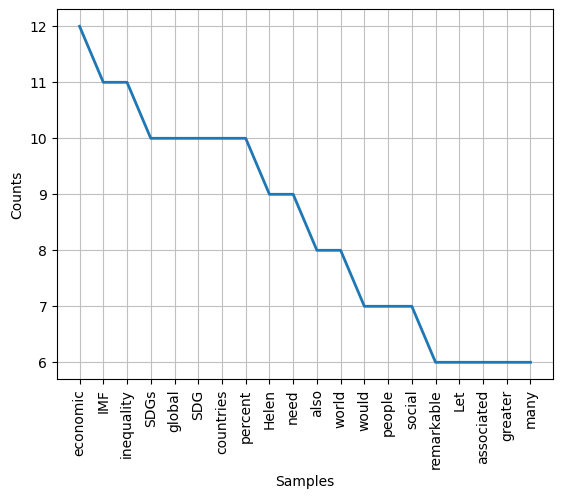

In [29]:
base_url = 'https://www.imf.org/en/News/Articles/2018/09/17/sp09172018-the-case-for-the-sustainable-development-goals'
r = requests.get(base_url)
soup = BeautifulSoup(r.text, 'html.parser')

imf_text = ' '.join([p.get_text().replace('\n', ' ') for p in soup.find_all('p')])

imf_tokens = imf_text.split()

clean_imf = [word for word in imf_tokens if word.lower() not in stopwords and word.isalpha()]

fdist2 = FreqDist(clean_imf)
print(fdist2.most_common(20))

fdist2.plot(20)

5 pts Please read the speech. What does the word frequency tell us, if anything, about the speech? Please answer in a short paragraph that tells me how the word frequency distribution is good at finding meaning, but also may miss the meaning that you gained from actually reading the article.

Your paragraph here:




### Intro to Summarization
Summarization has been a thorny problem for data scientists over the past decade. There have been many approaches, but most, until ChatGPT and it's use of the transformers' architecture, they have been unsatisfactory. There are two main types of summarization:

Extractive Summarization: Finding the most important sentences and rendering them verbatim.

Abstractive Summarization: Taking the most important ideas from a document and generating a summary based on them

There have been many different algorithms that have attempted summarization. Let's learn about one of the most used and deploy it in python.

#### Luhns Heuristic Method
This is one of the earliest approaches of text summarization. This is related to our manual interpretation of the importance of word frequency in a document.Basically, just as we did, Luhn recognized that word frequency and word significance is highly correlated, but only "important" words. The assumption that the most important sentences are those with the most significant words. Here is a nice short article that explains the algo in an accessible way: https://blog.fastforwardlabs.com/2016/03/25/h.p.-luhn-and-the-heuristic-value-of-simplicity.html

##### Sumy is a python package that has a lot of different commons summarization methods including LSA, LexRank and Luhn.

In [30]:
#install sumy package
!pip install sumy

Run the following code. Pass the document you want to summarize as a variable in the document part of the statement below. Use the variable that you saved the document into if it's something different.

PlaintextParser.from_string(document,Tokenizer("english"))

In [ ]:
from sumy.summarizers.luhn import LuhnSummarizer
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer

parser = PlaintextParser.from_string(document, Tokenizer("english"))

summarizer_luhn = LuhnSummarizer()
summary_1 =summarizer_luhn(parser.document,2)
for sentence in summary_1:
    print(sentence)

And she came to this conclusion with her legendary pragmatism—by “shining a light on the data.”', 'As she once said in an interview: "If we’re all from the same group, from the same kind of background, if we’re given a problem we tend to get stuck at the same place.
', 'So my fundamental point here is that if we are to succeed with the SDGs, we will need greater diversity in the business world—to raise economic dynamism and to help orient business and finance toward the longer-term investments needed for SDG success.


10 pts Evaluate the Luhn summarization below on the document you selected in the previous problem. How did it do?

Your evaluation here:

10 pts Now look at the documentation for Sumy and use the Lex Rank summarization algo.


In [32]:
# Your code here:
from sumy.summarizers.lex_rank import LexRankSummarizer
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer

document_as_one = ' '.join(document)

# Creating a parser and tokenizer for the text
parser = PlaintextParser.from_string(document_as_one, Tokenizer("english"))

# Using LexRankSummarizer to summarize the document
summarizer_lex_rank = LexRankSummarizer()

# Summarizing the document to 2 sentences
summary_lex_rank = summarizer_lex_rank(parser.document, 2)

# Printing the sentences in the summary
for sentence in summary_lex_rank:
    print(sentence)

Economic Dimension Let me begin with the economic dimension—where I would like to focus on the particular SDG challenges of the low-income countries.
What is the role of the IMF in this?


How does Lex Rank work? Explain it to me and evaluate the differences in the two algos.

5 pts Your explanation and evaluation here:
LexRank is a graph-based algorithm that ranks sentences by their similarity and importance within the document, applying a variation of PageRank to identify the most central sentences. It captures relationships between sentences and is well-suited for summarizing longer, more complex texts where sentence interconnectivity is crucial. In contrast, the Luhn algorithm focuses on word frequency and clustering within individual sentences, scoring sentences based on how many important words they contain. Luhn is simpler and faster but treats sentences in isolation, making it more appropriate for shorter texts or when a quick, keyword-based summary is needed. While LexRank excels in thematic coherence, Luhn is more direct in identifying key content based on word importance.


#### Using ChatGPT for Summarization
Now use Chatgpt to perform extractive and abstractive summarization on your document. Copy and paste into prompt. You will see that the document may be too long, so you may have to break the document into parts. Does where you break your document impact the summarization?

5 pts Copy and paste your prompt and the ChatGPT extractive summarization here:

"The speaker delivers an inaugural lecture in honor of Dame Helen Alexander, reflecting on her remarkable qualities—intelligence, compassion, and leadership—and her deep commitment to education, healthcare, and sustainable development. The speaker highlights Helen’s legacy, particularly in promoting gender equity and diversity in leadership.

The speech focuses on the Sustainable Development Goals (SDGs), addressing four key dimensions:

Economic: The need to support low-income countries in achieving the SDGs, particularly in education, healthcare, and infrastructure, despite challenges such as rising debt.
Social: The importance of addressing income inequality and gender inequality, noting how inclusion can boost growth and development.
Environmental: The urgent need to combat climate change through initiatives like carbon pricing and sustainable practices.
Governance: The role of strong institutions in achieving SDGs, particularly in fighting corruption and promoting transparency.
The speaker concludes by celebrating Helen's lasting legacy, encouraging the audience to pursue these goals for future generations."

5 pts Copy and paste your prompt and the ChatGPT abstractive summarization here:



5 pts Does breaking the document in different places impact the summarization? Answer here:

Breaking the document in different places can impact the summarization because it may disrupt the flow of information and context. When the entire text is provided at once, it allows for a more cohesive and comprehensive summary. If the document is sent in parts, the summarization might focus on individual sections without fully capturing the overall structure and key themes of the entire text.


5 pts Watch this video, and be prepared for a quiz on it! 
https://www.youtube.com/watch?v=wjZofJX0v4M&list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi&index=5
